In [1]:
from math import sin, cos, pi
from fem.oned_stochastic import solve_system
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def f(x):
    return 2*pi**2 * sin(pi*x)

N, d, p = 128, 1, 1

In [3]:
v = solve_system(N, d, p, 10e-2, 1, f)
u = solve_system(N, d, p+1, 10e-2, 1, f)
q = solve_system(N, d, p+2, 10e-2, 1, f)

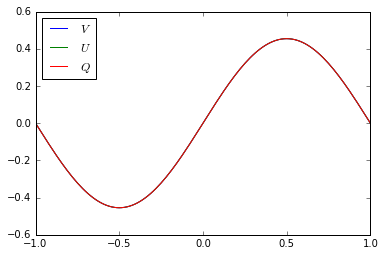

In [4]:
xs = np.linspace(-1, 1, N+1)

fig, ax = plt.subplots(1)
ax.plot(xs, v[0,:], label=r'$V$')
ax.plot(xs, u[0,:], label=r'$U$')
ax.plot(xs, q[0,:], label=r'$Q$')
ax.legend(loc=0)

In [5]:
from fem.polynomial_chaos import legendre_chaos, eval_chi_s_squared
from fem.oned_deterministic import hat_basis


def calc_variance(polybasis, u):
    P, N = u.shape
    var = np.zeros((N,))
    spatial_basis = hat_basis(N)

    for s in range(1, P):
    
        chi_sq = eval_chi_s_squared(polybasis, s)
    
        for j in range(1, N-1):
            
            ujm = lambda x: (u[s,j] * u[s, j-1]) * spatial_basis[j](x) * spatial_basis[j-1](x)
            ujj = lambda x: K
            
            var[j] += (u[s, j] * (u[s, j-1] + u[s, j] + u[s,j+1]))*chi_sq

    return var

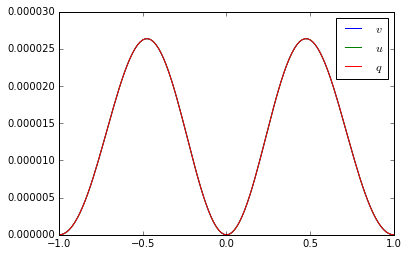

In [6]:
xs = np.linspace(-1, 1, N+1)

basisv = legendre_chaos(d, p)
basisu = legendre_chaos(d, p+1)
basisq = legendre_chaos(d, p+2)

fig, ax = plt.subplots(1)
ax.plot(xs, calc_variance(basisv, v), label=r'$v$')
ax.plot(xs, calc_variance(basisu, u), label=r'$u$')
ax.plot(xs, calc_variance(basisq, q), label=r'$q$')
ax.legend(loc=0)

In [1]:
def hat_basis(xkm, xk, xkp):
    
    
    def phi_k(x):
        
        if x < xkm or x > xkp:
            return 0
        
        if x < xk:
            return (x - xkm)/(xk - xkm)
        else: 
            return (xkp - x)/(xkp - xk)
        
    return phi_k

def physical_basis(a, b, N):
    
    xs, h = np.linspace(a, b, N+1, retstep=True)
    
    # A bit of care is needed for x_0
    bases = [hat_basis(a-h, a, a+h)]
    
    # Build the middle
    for i in range(1, N):
        bases.append(hat_basis(xs[i-1], xs[i], xs[i+1]))
        
    # And some care is needed for x_N
    bases.append(hat_basis(b-h, b, b+h))
    
    return bases

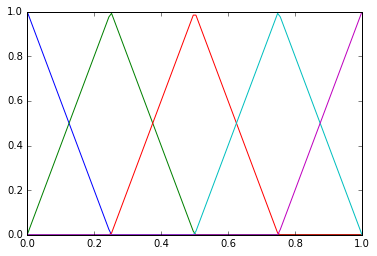

In [2]:
from fem.oned_deterministic import hat_basis

xs = np.linspace(0, 1, 128)

N = 4
basis = hat_basis(0, 1, N)

fig, ax = plt.subplots(1)

for k in range(N+1):
    ax.plot(xs, [basis[k](x) for x in xs])